In [27]:
# Imports
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# You may want to adjust these parameters
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS = 70
CHANNELS = 3

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   r'C:\Users\VIT-AP\Desktop\Irfan\archive (2)\OralCancer',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

class_names = dataset.class_names

# Get dataset length
len(dataset)

# Display a batch of images and their labels
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

# Define a function to split the dataset into training, validation, and testing
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# Define data preprocessing and augmentation pipelines
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

# Create the CNN model
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)





Found 131 files belonging to 2 classes.
(62, 256, 256, 3)
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (62, 256, 256, 3)         0         
                                                                 
 conv2d_30 (Conv2D)          (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPooli  (62, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPooli  (62, 62, 62, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (62, 60, 60, 64)        

In [29]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + val_split + test_split) == 1
    
    # Calculate the dataset size
    ds_size = sum(1 for _ in ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    # Split dataset
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    # Optimize each dataset partition with cache and prefetch
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
    
    return train_ds, val_ds, test_ds


In [30]:

# Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=test_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/70
2/2 [==============================] - 4s 2s/step - loss: 2.1355 - accuracy: 0.3226 - val_loss: 1.7892 - val_accuracy: 0.5714
Epoch 2/70
2/2 [==============================] - 2s 861ms/step - loss: 1.5273 - accuracy: 0.6694 - val_loss: 1.0005 - val_accuracy: 0.5714
Epoch 3/70
2/2 [==============================] - 2s 842ms/step - loss: 0.8314 - accuracy: 0.6694 - val_loss: 0.8357 - val_accuracy: 0.5714
Epoch 4/70
2/2 [==============================] - 2s 844ms/step - loss: 0.8441 - accuracy: 0.5081 - val_loss: 0.8667 - val_accuracy: 0.2857
Epoch 5/70
2/2 [==============================] - 2s 875ms/step - loss: 0.7208 - accuracy: 0.6774 - val_loss: 1.3034 - val_accuracy: 0.5714
Epoch 6/70
2/2 [==============================] - 2s 856ms/step - loss: 0.7906 - accuracy: 0.6694 - val_loss: 0.8133 - val_accuracy: 0.5714
Epoch 7/70
2/2 [==============================] - 2s 850ms/step - loss: 0.6558 - accuracy: 0.6210 - val_loss: 0.8177 - val_accuracy: 0.1429
Epoch 8/70
2/2 [=======

In [31]:
print(f"Training dataset size: {len(train_ds)}")
print(f"Validation dataset size: {len(val_ds)}")
print(f"Testing dataset size: {len(test_ds)}")


Training dataset size: 2
Validation dataset size: 0
Testing dataset size: 1


1/1 [==============================] - 0s 37ms/step - loss: 0.0310 - accuracy: 1.0000


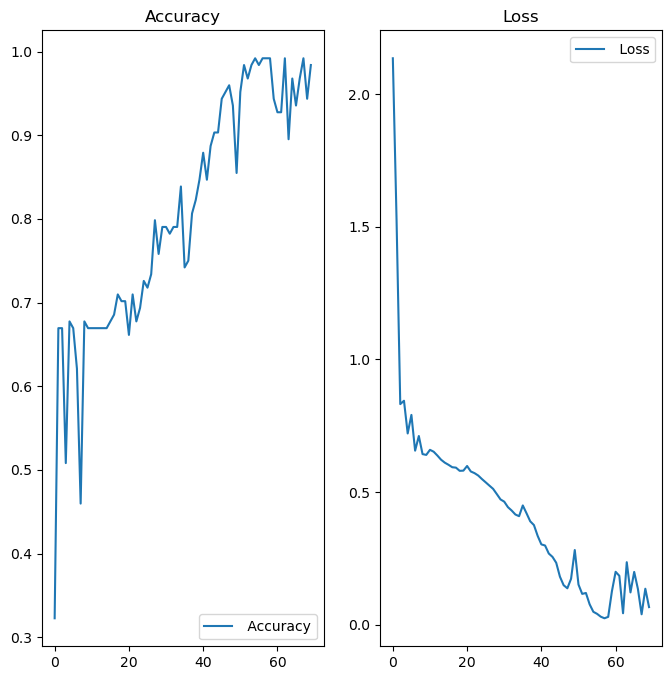

1/1 [==============================] - 0s 138ms/step


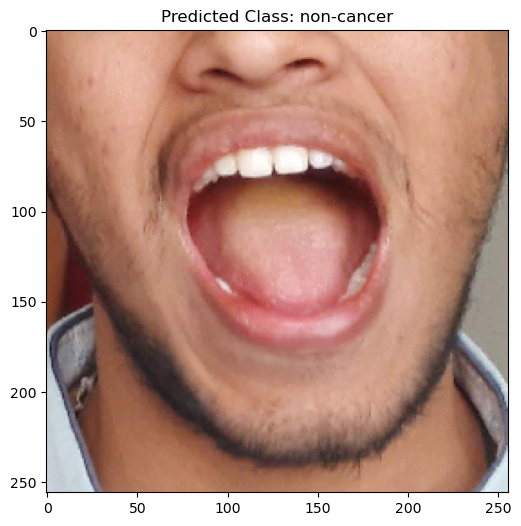

The predicted class is: non-cancer


C:\Users\VIT-AP\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
# Evaluate the model on the test dataset
model.evaluate(test_ds)

# Plot training history
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

# Example of using the trained model for prediction
image_path = r"C:\Users\VIT-AP\Desktop\Irfan\archive (2)\OralCancer\non-cancer\20200314_1130302.jpg"  # Replace with the actual path to your local image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
image_array = tf.keras.preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)

# Predict
pred = model.predict(scaled_img)

# Get the class name with the highest probability
output = class_names[np.argmax(pred)]

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title(f'Predicted Class: {output}')
plt.show()

print(f"The predicted class is: {output}")

# Save the trained model
model.save("Oral_cancer_detection.h5")

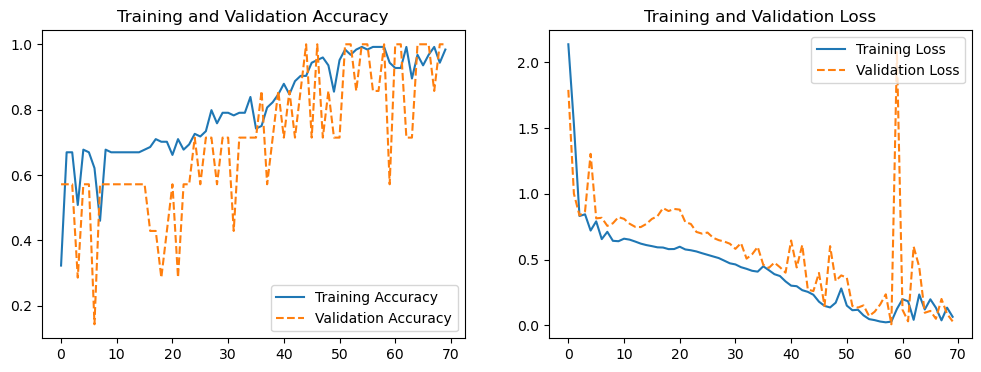

In [33]:
# Extract training and validation metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy', linestyle="--")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', linestyle="--")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [34]:
# Imports
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# You may want to adjust these parameters
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS = 70
CHANNELS = 3

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   r'C:\Users\VIT-AP\Desktop\Irfan\archive (2)\OralCancer',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

class_names = dataset.class_names

# Get dataset length
len(dataset)

# Display a batch of images and their labels
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

# Define a function to split the dataset into training, validation, and testing
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.2, test_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# Define data preprocessing and augmentation pipelines
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

# Create the CNN model
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)





Found 131 files belonging to 2 classes.
(62, 256, 256, 3)
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


AssertionError: 

In [36]:
# Imports
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.applications import ResNet50, InceptionV3
import numpy as np

# Parameters
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS = 70
CHANNELS = 3
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
N_CLASSES = 9

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\VIT-AP\Desktop\Irfan\archive (2)\OralCancer',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Function to split dataset into training, validation, and testing
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(int(val_split * ds_size))
    test_ds = ds.skip(train_size).skip(int(val_split * ds_size))
    return train_ds.prefetch(tf.data.AUTOTUNE), val_ds.prefetch(tf.data.AUTOTUNE), test_ds.prefetch(tf.data.AUTOTUNE)

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# Pre-trained ResNet50 model for feature extraction
resnet_model = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
resnet_model.trainable = False  # Freeze the ResNet layers

# Pre-trained InceptionV3 model for feature extraction
inception_model = InceptionV3(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
inception_model.trainable = False  # Freeze the Inception layers

# Define the hybrid model that combines ResNet50 and InceptionV3
input_layer = layers.Input(shape=INPUT_SHAPE)

# Pass inputs through ResNet50
resnet_features = resnet_model(input_layer)
resnet_features = layers.GlobalAveragePooling2D()(resnet_features)

# Pass inputs through InceptionV3
inception_features = inception_model(input_layer)
inception_features = layers.GlobalAveragePooling2D()(inception_features)

# Concatenate the features from both models
combined_features = layers.Concatenate()([resnet_features, inception_features])

# Add final dense layers for classification
x = layers.Dense(128, activation='relu')(combined_features)
x = layers.Dropout(0.3)(x)
output_layer = layers.Dense(N_CLASSES, activation='softmax')(x)

# Compile the hybrid model
hybrid_model = models.Model(inputs=input_layer, outputs=output_layer)
hybrid_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
hybrid_model.summary()

# Train the model
history = hybrid_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS
)


Found 131 files belonging to 2 classes.
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 resnet50 (Functional)       (None, 8, 8, 2048)           2358771   ['input_8[0][0]']             
                                                          2                                       
                                                                                                  
 inception_v3 (Functional)   (None, 6, 6, 2048)           2180278   ['input_8[0][0]']             
                                                          4                                       
                                                    

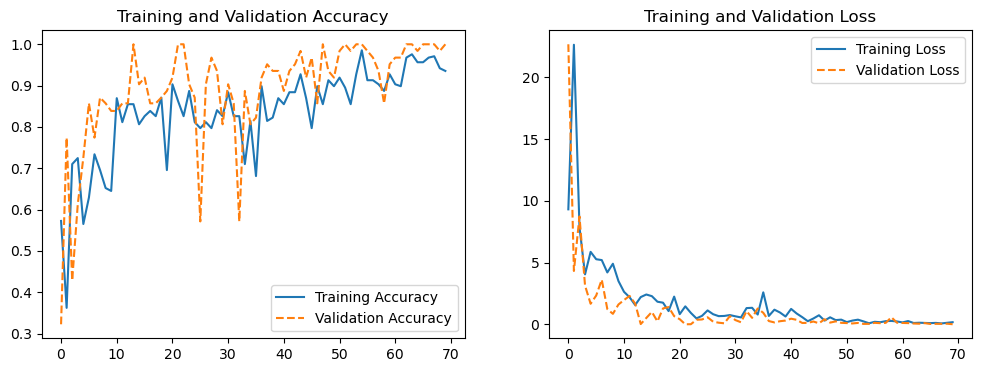

In [37]:
# Extract training and validation metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy', linestyle="--")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', linestyle="--")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


1/1 [==============================] - 1s 920ms/step - loss: 0.0328 - accuracy: 1.0000
Test Accuracy: 1.00
1/1 [==============================] - 5s 5s/step


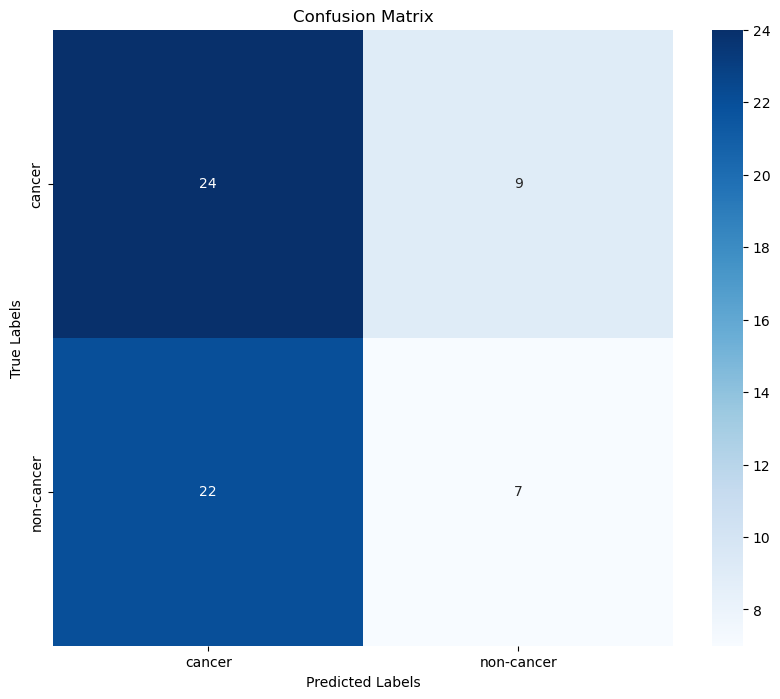

Classification Report:
               precision    recall  f1-score   support

      cancer       0.52      0.73      0.61        33
  non-cancer       0.44      0.24      0.31        29

    accuracy                           0.50        62
   macro avg       0.48      0.48      0.46        62
weighted avg       0.48      0.50      0.47        62



C:\Users\VIT-AP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


IndexError: list index out of range

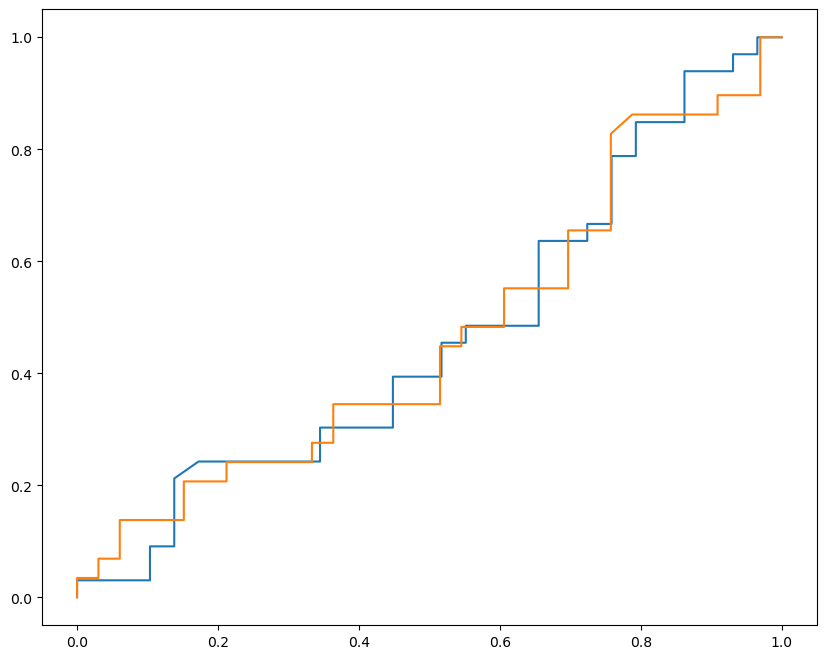

In [38]:
# Additional Imports for Evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluate the model on the test dataset
test_loss, test_accuracy = hybrid_model.evaluate(test_ds)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Get the true labels and predictions for the test set
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = hybrid_model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.class_names, yticklabels=dataset.class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_true, y_pred, target_names=dataset.class_names)
print("Classification Report:\n", class_report)

# ROC Curve and AUC
plt.figure(figsize=(10, 8))
for i in range(N_CLASSES):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {dataset.class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [40]:
# Imports
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Parameters
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS = 70
CHANNELS = 3
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
N_CLASSES = 9

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\VIT-AP\Desktop\Irfan\archive (2)\OralCancer',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Function to split dataset into training, validation, and testing
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(int(val_split * ds_size))
    test_ds = ds.skip(train_size).skip(int(val_split * ds_size))
    return train_ds.prefetch(tf.data.AUTOTUNE), val_ds.prefetch(tf.data.AUTOTUNE), test_ds.prefetch(tf.data.AUTOTUNE)

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# Pre-trained ResNet50 model for feature extraction
resnet_model = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
resnet_model.trainable = False  # Freeze the ResNet layers

# Pre-trained InceptionV3 model for feature extraction
inception_model = InceptionV3(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
inception_model.trainable = False  # Freeze the Inception layers

# Define the hybrid model that combines ResNet50 and InceptionV3
input_layer = layers.Input(shape=INPUT_SHAPE)

# Pass inputs through ResNet50
resnet_features = resnet_model(input_layer)
resnet_features = layers.GlobalAveragePooling2D()(resnet_features)

# Pass inputs through InceptionV3
inception_features = inception_model(input_layer)
inception_features = layers.GlobalAveragePooling2D()(inception_features)

# Concatenate the features from both models
combined_features = layers.Concatenate()([resnet_features, inception_features])

# Add final dense layers for classification
x = layers.Dense(128, activation='relu')(combined_features)
x = layers.Dropout(0.3)(x)
output_layer = layers.Dense(N_CLASSES, activation='softmax')(x)

# Compile the hybrid model
hybrid_model = models.Model(inputs=input_layer, outputs=output_layer)
hybrid_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
hybrid_model.summary()

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model with early stopping
history = hybrid_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)


Found 131 files belonging to 2 classes.
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 resnet50 (Functional)       (None, 8, 8, 2048)           2358771   ['input_14[0][0]']            
                                                          2                                       
                                                                                                  
 inception_v3 (Functional)   (None, 6, 6, 2048)           2180278   ['input_14[0][0]']            
                                                          4                                       
                                                    

In [42]:
# Imports
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.applications import ResNet50, InceptionV3
import numpy as np

# Parameters
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS = 70
CHANNELS = 3
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
N_CLASSES = 9

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\VIT-AP\Desktop\Irfan\archive (2)\OralCancer',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Function to split dataset into training, validation, and testing
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(int(val_split * ds_size))
    test_ds = ds.skip(train_size).skip(int(val_split * ds_size))
    return train_ds.prefetch(tf.data.AUTOTUNE), val_ds.prefetch(tf.data.AUTOTUNE), test_ds.prefetch(tf.data.AUTOTUNE)

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# Pre-trained ResNet50 model for feature extraction
resnet_model = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
resnet_model.trainable = False  # Freeze the ResNet layers

# Pre-trained InceptionV3 model for feature extraction
inception_model = InceptionV3(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
inception_model.trainable = False  # Freeze the Inception layers

# Define the hybrid model that combines ResNet50 and InceptionV3
input_layer = layers.Input(shape=INPUT_SHAPE)

# Pass inputs through ResNet50
resnet_features = resnet_model(input_layer)
resnet_features = layers.GlobalAveragePooling2D()(resnet_features)

# Pass inputs through InceptionV3
inception_features = inception_model(input_layer)
inception_features = layers.GlobalAveragePooling2D()(inception_features)

# Concatenate the features from both models
combined_features = layers.Concatenate()([resnet_features, inception_features])

# Add final dense layers for classification
x = layers.Dense(128, activation='relu')(combined_features)
x = layers.Dropout(0.3)(x)
output_layer = layers.Dense(N_CLASSES, activation='softmax')(x)

# Compile the hybrid model
hybrid_model = models.Model(inputs=input_layer, outputs=output_layer)
hybrid_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
hybrid_model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = hybrid_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
        callbacks=[early_stopping]

)


Found 131 files belonging to 2 classes.
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 resnet50 (Functional)       (None, 8, 8, 2048)           2358771   ['input_17[0][0]']            
                                                          2                                       
                                                                                                  
 inception_v3 (Functional)   (None, 6, 6, 2048)           2180278   ['input_17[0][0]']            
                                                          4                                       
                                                    

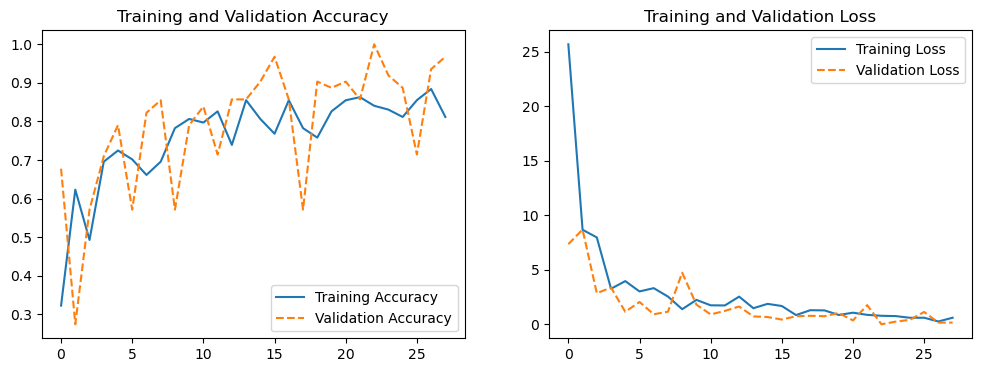

In [45]:
import matplotlib.pyplot as plt

# Extract training and validation metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))  # Adjust the range to match the number of epochs trained

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', linestyle="--")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss', linestyle="--")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


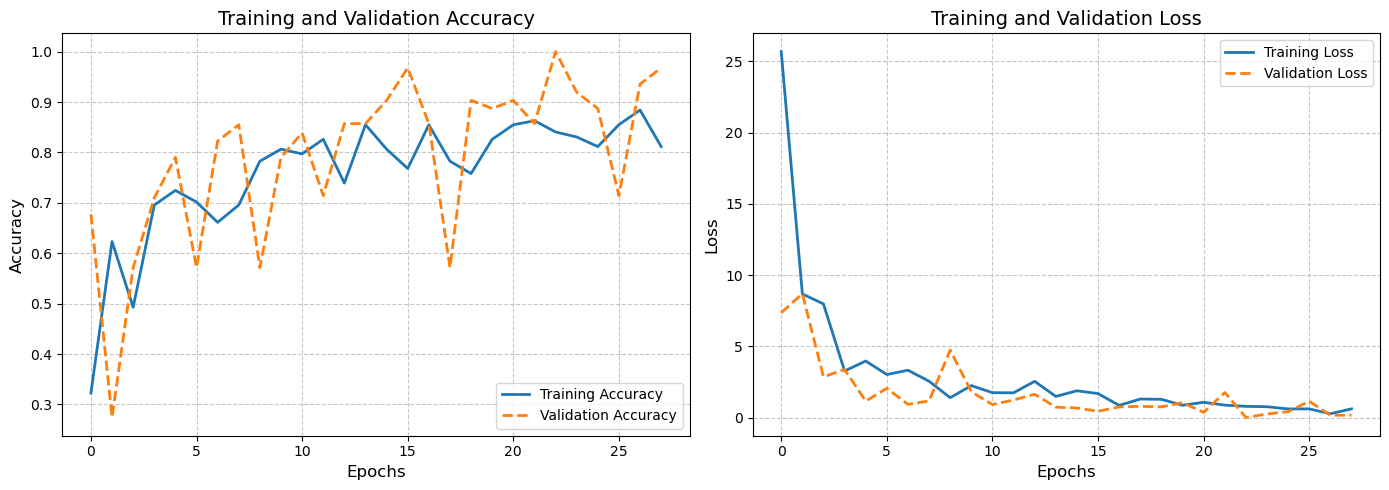

In [46]:
import matplotlib.pyplot as plt

# Extract training and validation metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot training and validation accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', linewidth=2)
plt.plot(epochs_range, val_acc, label='Validation Accuracy', linestyle="--", linewidth=2)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.legend(loc='lower right')
plt.grid(visible=True, linestyle="--", alpha=0.7)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', linewidth=2)
plt.plot(epochs_range, val_loss, label='Validation Loss', linestyle="--", linewidth=2)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss', fontsize=14)
plt.legend(loc='upper right')
plt.grid(visible=True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import HeNormal
import numpy as np

# Parameters
INPUT_SHAPE = (224, 224, 3)
N_CLASSES = 2  # Cancerous and Non-Cancerous

# Custom Hybrid Model Definition
def build_hybrid_model(input_shape=INPUT_SHAPE, n_classes=N_CLASSES):
    input_layer = layers.Input(shape=input_shape)

    # First feature extraction block
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer=HeNormal())(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Second feature extraction block
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Third feature extraction block with Dilation
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', dilation_rate=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Attention Mechanism
    attention = layers.Conv2D(256, (1, 1), activation='sigmoid')(x)  # Adjust channels to match
    x = layers.Multiply()([x, attention])
    
    # Flatten the output and add dense layers
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output_layer = layers.Dense(n_classes, activation='softmax')(x)

    # Compile model
    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model


Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 1.0019 - accuracy: 0.8116
Epoch 1: val_accuracy improved from -inf to 0.93548, saving model to novel_hybrid_model.h5


C:\Users\VIT-AP\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 8s 4s/step - loss: 1.0019 - accuracy: 0.8116 - val_loss: 0.3839 - val_accuracy: 0.9355
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 0.5961 - accuracy: 0.8871
Epoch 2: val_accuracy did not improve from 0.93548
2/2 [==============================] - 9s 6s/step - loss: 0.5961 - accuracy: 0.8871 - val_loss: 0.3031 - val_accuracy: 0.8871
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 0.5884 - accuracy: 0.8871
Epoch 3: val_accuracy improved from 0.93548 to 1.00000, saving model to novel_hybrid_model.h5
2/2 [==============================] - 8s 4s/step - loss: 0.5884 - accuracy: 0.8871 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - ETA: 0s - loss: 0.4339 - accuracy: 0.8986
Epoch 4: val_accuracy did not improve from 1.00000
2/2 [==============================] - 7s 6s/step - loss: 0.4339 - accuracy: 0.8986 - val_loss: 0.2845 - val_accuracy: 0.9194
Epoch 5/50
2/2 [========

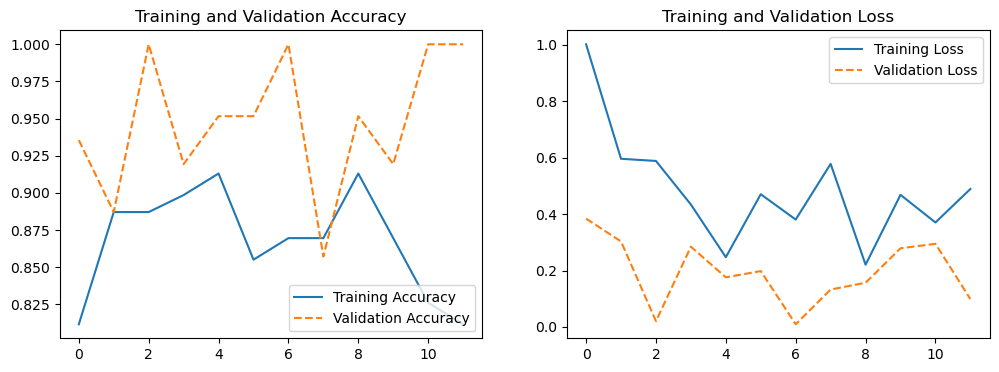

In [51]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('novel_hybrid_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Training
history = hybrid_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=50,
    callbacks=[early_stopping, checkpoint]
)

# Evaluate and Visualize
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle="--")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle="--")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [52]:
# Imports
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.applications import ResNet50, InceptionV3
import numpy as np

# Parameters
BATCH_SIZE = 32
IMAGE_SIZE = 256
EPOCHS = 30
CHANNELS = 3
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
N_CLASSES = 9

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\VIT-AP\Desktop\Irfan\archive (2)\OralCancer',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Function to split dataset into training, validation, and testing
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(int(val_split * ds_size))
    test_ds = ds.skip(train_size).skip(int(val_split * ds_size))
    return train_ds.prefetch(tf.data.AUTOTUNE), val_ds.prefetch(tf.data.AUTOTUNE), test_ds.prefetch(tf.data.AUTOTUNE)

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# Pre-trained ResNet50 model for feature extraction
resnet_model = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
resnet_model.trainable = False  # Freeze the ResNet layers

# Pre-trained InceptionV3 model for feature extraction
inception_model = InceptionV3(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
inception_model.trainable = False  # Freeze the Inception layers

# Define the hybrid model that combines ResNet50 and InceptionV3
input_layer = layers.Input(shape=INPUT_SHAPE)

# Pass inputs through ResNet50
resnet_features = resnet_model(input_layer)
resnet_features = layers.GlobalAveragePooling2D()(resnet_features)

# Pass inputs through InceptionV3
inception_features = inception_model(input_layer)
inception_features = layers.GlobalAveragePooling2D()(inception_features)

# Concatenate the features from both models
combined_features = layers.Concatenate()([resnet_features, inception_features])

# Add final dense layers for classification
x = layers.Dense(128, activation='relu')(combined_features)
x = layers.Dropout(0.3)(x)
output_layer = layers.Dense(N_CLASSES, activation='softmax')(x)

# Compile the hybrid model
hybrid_model = models.Model(inputs=input_layer, outputs=output_layer)
hybrid_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
hybrid_model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = hybrid_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
        callbacks=[early_stopping]

)


Found 131 files belonging to 2 classes.
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_21 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 resnet50 (Functional)       (None, 8, 8, 2048)           2358771   ['input_21[0][0]']            
                                                          2                                       
                                                                                                  
 inception_v3 (Functional)   (None, 6, 6, 2048)           2180278   ['input_21[0][0]']            
                                                          4                                       
                                                    

In [2]:
# Imports
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# You may want to adjust these parameters
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS = 70
CHANNELS = 3

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   r'C:\Users\VIT-AP\Desktop\Irfan\archive (2)\OralCancer',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

class_names = dataset.class_names

# Define a function to split the dataset into training, validation, and testing
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    # Autotune all the 3 datasets
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
    
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# Define data preprocessing and augmentation pipelines
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

# Model inspired by CST-YOLO, customized for classification
def create_oral_cancer_model(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), n_classes=len(class_names)):
    inputs = layers.Input(shape=input_shape)
    
    # Data preprocessing
    x = resize_and_rescale(inputs)
    
    # Backbone: Initial Convolutional Layers
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Multi-scale feature extraction
    # Path 1
    p1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    p1 = layers.MaxPooling2D((2, 2))(p1)
    
    # Path 2 with a larger kernel
    p2 = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(x)
    p2 = layers.MaxPooling2D((2, 2))(p2)
    
    # Path 3 with a smaller kernel
    p3 = layers.Conv2D(64, (7, 7), activation='relu', padding='same')(x)
    p3 = layers.MaxPooling2D((2, 2))(p3)
    
    # Concatenate multi-scale features
    x = layers.Concatenate()([p1, p2, p3])
    
    # Convolutional layers after multi-scale feature fusion
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Additional feature extraction layers
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Flatten and fully connected layers for classification
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    # Output layer with softmax for multi-class classification
    outputs = layers.Dense(n_classes, activation='softmax')(x)
    
    model = models.Model(inputs, outputs)
    return model

# Create and compile the model
model = create_oral_cancer_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc}")


Found 131 files belonging to 2 classes.
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 sequential_1 (Sequential)   (None, 256, 256, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv2d_6 (Conv2D)           (None, 256, 256, 32)         896       ['sequential_1[0][0]']        
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 128, 128, 32)         0         ['conv2d_6[0][0]']            
 g2D)                                               

Epoch 20/70
2/2 [==============================] - 6s 4s/step - loss: 0.5520 - accuracy: 0.6694 - val_loss: 0.5376 - val_accuracy: 0.6774
Epoch 21/70
2/2 [==============================] - 6s 4s/step - loss: 0.5308 - accuracy: 0.6935 - val_loss: 0.5667 - val_accuracy: 0.6774
Epoch 22/70
2/2 [==============================] - 6s 4s/step - loss: 0.5162 - accuracy: 0.7177 - val_loss: 0.5358 - val_accuracy: 0.6774
Epoch 23/70
2/2 [==============================] - 7s 4s/step - loss: 0.5056 - accuracy: 0.7016 - val_loss: 0.5083 - val_accuracy: 0.6774
Epoch 24/70
2/2 [==============================] - 7s 4s/step - loss: 0.5322 - accuracy: 0.6855 - val_loss: 0.4855 - val_accuracy: 0.6774
Epoch 25/70
2/2 [==============================] - 7s 4s/step - loss: 0.4281 - accuracy: 0.7339 - val_loss: 0.4888 - val_accuracy: 0.8065
Epoch 26/70
2/2 [==============================] - 7s 4s/step - loss: 0.4610 - accuracy: 0.7903 - val_loss: 0.4465 - val_accuracy: 0.8226
Epoch 27/70
2/2 [=================

In [3]:
# Imports
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import itertools

# You may want to adjust these parameters
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS = 70
CHANNELS = 3

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   r'C:\Users\VIT-AP\Desktop\Irfan\archive (2)\OralCancer',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

class_names = dataset.class_names

# Define a function to split the dataset into training, validation, and testing
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    # Autotune all the 3 datasets
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
    
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# Define data preprocessing and augmentation pipelines
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

# Model inspired by CST-YOLO, customized for classification
def create_oral_cancer_model(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), n_classes=len(class_names)):
    inputs = layers.Input(shape=input_shape)
    
    # Data preprocessing
    x = resize_and_rescale(inputs)
    
    # Backbone: Initial Convolutional Layers
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Multi-scale feature extraction
    # Path 1
    p1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    p1 = layers.MaxPooling2D((2, 2))(p1)
    
    # Path 2 with a larger kernel
    p2 = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(x)
    p2 = layers.MaxPooling2D((2, 2))(p2)
    
    # Path 3 with a smaller kernel
    p3 = layers.Conv2D(64, (7, 7), activation='relu', padding='same')(x)
    p3 = layers.MaxPooling2D((2, 2))(p3)
    
    # Concatenate multi-scale features
    x = layers.Concatenate()([p1, p2, p3])
    
    # Convolutional layers after multi-scale feature fusion
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Additional feature extraction layers
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Flatten and fully connected layers for classification
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    # Output layer with softmax for multi-class classification
    outputs = layers.Dense(n_classes, activation='softmax')(x)
    
    model = models.Model(inputs, outputs)
    return model

# Create and compile the model
model = create_oral_cancer_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc}")

# Plotting Training and Validation Accuracy and Loss
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    
    plt.show()

plot_history(history)

# Confusion Matrix and Classification Report
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Generate predictions and calculate confusion matrix
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)

cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, class_names)

# ROC Curve and AUC (for each class in a multi-class setting)
from sklearn.preprocessing import label_binarize

y_true_binarized = label_binarize(y_true, classes=[i for i in range(len(class_names))])
y_pred_prob = model.predict(test_ds)

plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()


Found 131 files belonging to 2 classes.
Epoch 1/70
2/2 [==============================] - ETA: 0s - loss: 1.9742 - accuracy: 0.5565

ValueError: Expected input data to be non-empty.

In [8]:
# Imports
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Parameters
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS = 70
CHANNELS = 3

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   r'C:\Users\VIT-AP\Desktop\Irfan\archive (2)\OralCancer',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

class_names = dataset.class_names

# Define a function to split the dataset into training, validation, and testing
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    # Print dataset sizes for verification
    print(f"Total dataset size: {ds_size}")
    print(f"Training set size: {len(train_ds)}")
    print(f"Validation set size: {len(val_ds)}")
    print(f"Test set size: {len(test_ds)}")
    
    # Autotune all the 3 datasets
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
    
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# Check if validation dataset is empty
if len(val_ds) == 0:
    print("Warning: Validation dataset is empty. Adjusting dataset split ratios.")
    # Adjust splits to ensure validation data has samples
    train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset, train_split=0.7, val_split=0.15, test_split=0.15)

# Define data preprocessing and augmentation pipelines
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

# Model inspired by CST-YOLO, customized for classification
def create_oral_cancer_model(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), n_classes=len(class_names)):
    inputs = layers.Input(shape=input_shape)
    
    # Data preprocessing
    x = resize_and_rescale(inputs)
    
    # Backbone: Initial Convolutional Layers
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Multi-scale feature extraction
    # Path 1
    p1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    p1 = layers.MaxPooling2D((2, 2))(p1)
    
    # Path 2 with a larger kernel
    p2 = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(x)
    p2 = layers.MaxPooling2D((2, 2))(p2)
    
    # Path 3 with a smaller kernel
    p3 = layers.Conv2D(64, (7, 7), activation='relu', padding='same')(x)
    p3 = layers.MaxPooling2D((2, 2))(p3)
    
    # Concatenate multi-scale features
    x = layers.Concatenate()([p1, p2, p3])
    
    # Convolutional layers after multi-scale feature fusion
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Additional feature extraction layers
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Flatten and fully connected layers for classification
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    # Output layer with softmax for multi-class classification
    outputs = layers.Dense(n_classes, activation='softmax')(x)
    
    model = models.Model(inputs, outputs)
    return model

# Create and compile the model
model = create_oral_cancer_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc}")


Found 131 files belonging to 2 classes.
Total dataset size: 3
Training set size: 2
Validation set size: 0
Test set size: 1
Total dataset size: 3
Training set size: 2
Validation set size: 0
Test set size: 1
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 sequential_5 (Sequential)   (None, 256, 256, 3)          0         ['input_9[0][0]']             
                                                                                                  
 conv2d_124 (Conv2D)         (None, 256, 256, 32)         896       ['sequential_5[0][0]']        
                                                                                    

ValueError: Expected input data to be non-empty.

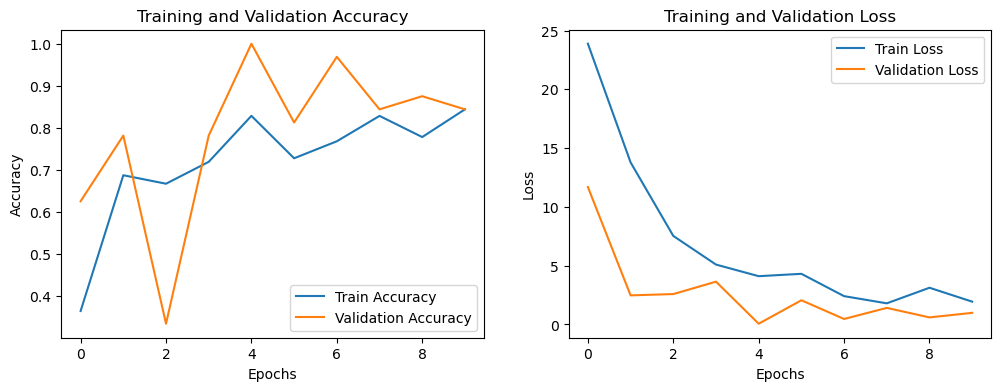

1/1 [==============================] - 4s 4s/step


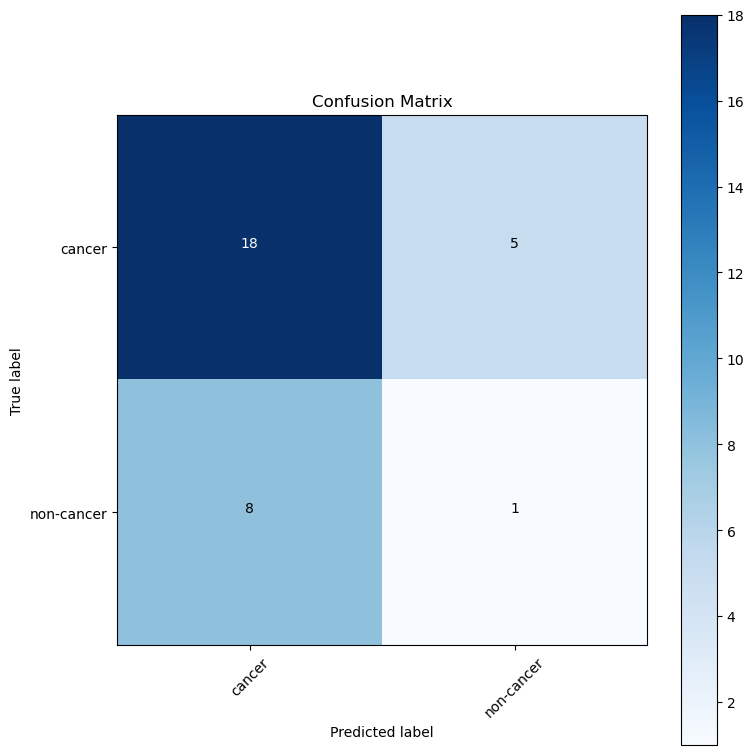

1/1 [==============================] - 2s 2s/step


C:\Users\VIT-AP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


IndexError: list index out of range

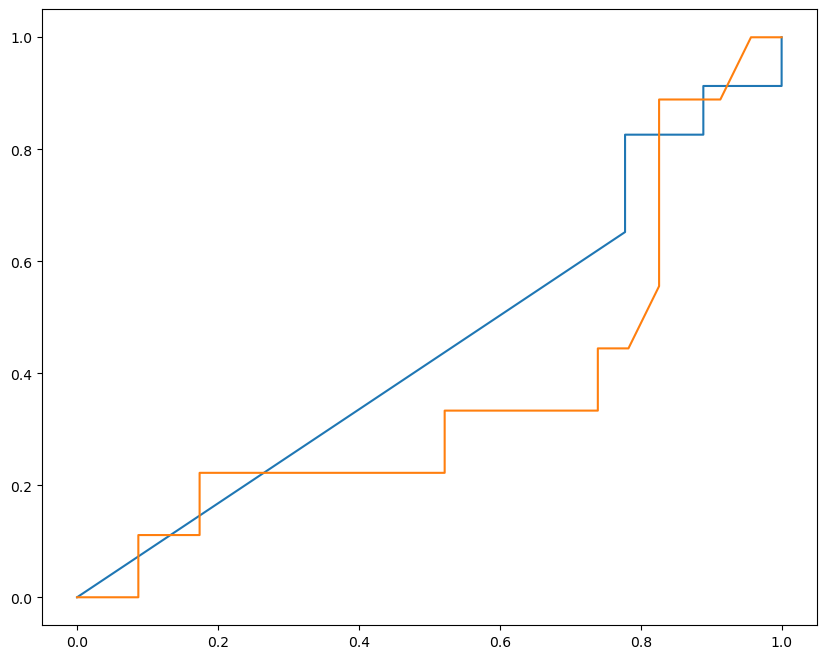

In [5]:

# Plot Training and Validation Accuracy and Loss
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    
    plt.show()

plot_history(history)

# Confusion Matrix and Classification Report
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Generate predictions and calculate confusion matrix
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(hybrid_model.predict(test_ds), axis=1)

cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, class_names)

# ROC Curve and AUC (for each class in a multi-class setting)
from sklearn.preprocessing import label_binarize

y_true_binarized = label_binarize(y_true, classes=[i for i in range(N_CLASSES)])
y_pred_prob = hybrid_model.predict(test_ds)

plt.figure(figsize=(10, 8))
for i in range(N_CLASSES):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()


In [10]:
# Imports
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Parameters
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS = 70
CHANNELS = 3

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   r'C:\Users\VIT-AP\Desktop\Irfan\archive (2)\OralCancer',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

class_names = dataset.class_names

# Split dataset into training and testing only
def get_train_test_partition(ds, train_split=0.8, test_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size)
    
    # Print dataset sizes for verification
    print(f"Total dataset size: {ds_size}")
    print(f"Training set size: {len(train_ds)}")
    print(f"Test set size: {len(test_ds)}")
    
    # Autotune both datasets
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
    
    return train_ds, test_ds

train_ds, test_ds = get_train_test_partition(dataset)

# Define data preprocessing and augmentation pipelines
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

# Model inspired by CST-YOLO, customized for classification
def create_oral_cancer_model(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), n_classes=len(class_names)):
    inputs = layers.Input(shape=input_shape)
    
    # Data preprocessing
    x = resize_and_rescale(inputs)
    
    # Backbone: Initial Convolutional Layers
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Multi-scale feature extraction
    # Path 1
    p1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    p1 = layers.MaxPooling2D((2, 2))(p1)
    
    # Path 2 with a larger kernel
    p2 = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(x)
    p2 = layers.MaxPooling2D((2, 2))(p2)
    
    # Path 3 with a smaller kernel
    p3 = layers.Conv2D(64, (7, 7), activation='relu', padding='same')(x)
    p3 = layers.MaxPooling2D((2, 2))(p3)
    
    # Concatenate multi-scale features
    x = layers.Concatenate()([p1, p2, p3])
    
    # Convolutional layers after multi-scale feature fusion
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Additional feature extraction layers
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Flatten and fully connected layers for classification
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    # Output layer with softmax for multi-class classification
    outputs = layers.Dense(n_classes, activation='softmax')(x)
    
    model = models.Model(inputs, outputs)
    return model

# Create and compile the model
model = create_oral_cancer_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model with test set as validation data
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc}")


Found 131 files belonging to 2 classes.
Total dataset size: 3
Training set size: 2
Test set size: 1
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 sequential_7 (Sequential)   (None, 256, 256, 3)          0         ['input_11[0][0]']            
                                                                                                  
 conv2d_136 (Conv2D)         (None, 256, 256, 32)         896       ['sequential_7[0][0]']        
                                                                                                  
 max_pooling2d_46 (MaxPooli  (None, 128, 128, 32)         0         ['conv2d_136[0][0]']   

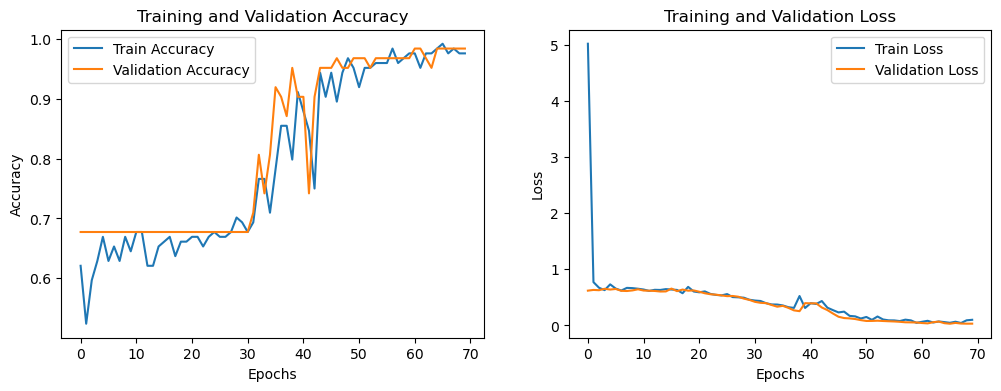

1/1 [==============================] - 1s 955ms/step


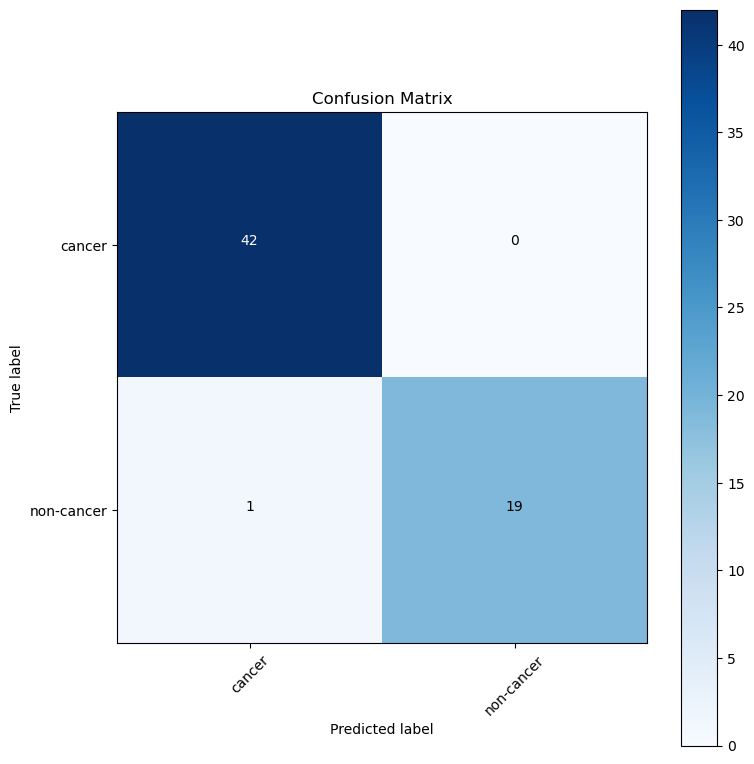

1/1 [==============================] - 1s 837ms/step


IndexError: index 1 is out of bounds for axis 1 with size 1

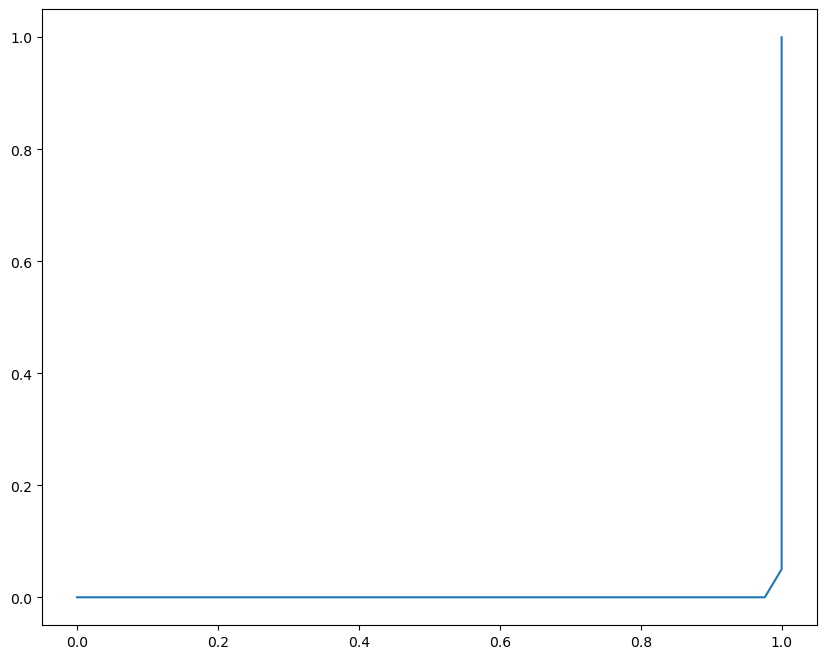

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import itertools

# Plot Training and Validation Accuracy and Loss
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    
    plt.show()

# Call the function to plot accuracy and loss
plot_training_history(history)

# Confusion Matrix and Classification Report
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Generate predictions and calculate confusion matrix
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, class_names)

# ROC Curve and AUC (for each class in a multi-class setting)
from sklearn.preprocessing import label_binarize

y_true_binarized = label_binarize(y_true, classes=[i for i in range(len(class_names))])
y_pred_prob = model.predict(test_ds)

plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()


1/1 [==============================] - 1s 914ms/step


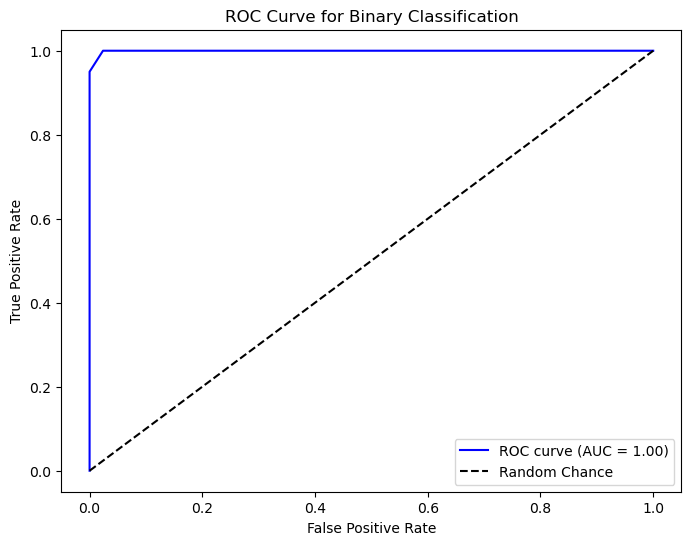

In [12]:
from sklearn.metrics import roc_curve, auc

# Check if binary classification
if len(class_names) == 2:
    # Only one class output, so use binary labels
    y_true_binarized = (y_true == 1).astype(int)  # Adjust if your positive class is labeled differently
    y_pred_prob = model.predict(test_ds)[:, 1]    # Use the probability of the positive class

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true_binarized, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Binary Classification')
    plt.legend(loc='lower right')
    plt.show()
else:
    # Multi-class ROC Curve (previous code for multi-class)
    y_true_binarized = label_binarize(y_true, classes=[i for i in range(len(class_names))])
    y_pred_prob = model.predict(test_ds)

    plt.figure(figsize=(10, 8))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Class')
    plt.legend(loc='lower right')
    plt.show()


1/1 [==============================] - 1s 939ms/step
Classification Report:
              precision    recall  f1-score   support

      cancer       0.98      1.00      0.99        42
  non-cancer       1.00      0.95      0.97        20

    accuracy                           0.98        62
   macro avg       0.99      0.97      0.98        62
weighted avg       0.98      0.98      0.98        62



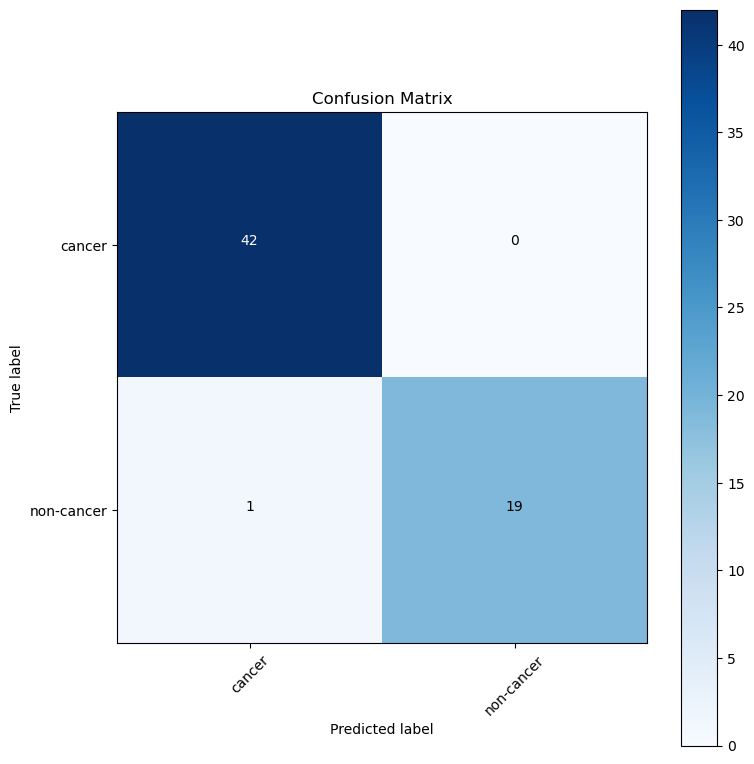

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions and true labels for the test set
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)


2/2 [==============================] - 1s 435ms/step


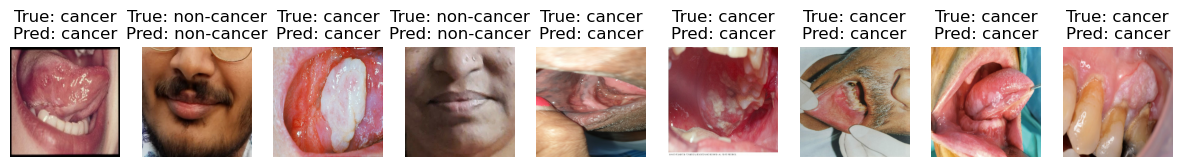

In [15]:
import matplotlib.pyplot as plt

# Function to display predictions on test images
def show_test_predictions(model, test_ds, class_names, num_images=5):
    plt.figure(figsize=(15, 15))
    for images, labels in test_ds.take(1):  # Take one batch from the test set
        predictions = model.predict(images)
        pred_labels = np.argmax(predictions, axis=1)
        for i in range(num_images):
            ax = plt.subplot(1, num_images, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            true_label = class_names[labels[i]]
            predicted_label = class_names[pred_labels[i]]
            plt.title(f"True: {true_label}\nPred: {predicted_label}")
            plt.axis("off")

# Show some test predictions
show_test_predictions(model, test_ds, class_names, num_images=9)


2/2 [==============================] - 1s 452ms/step


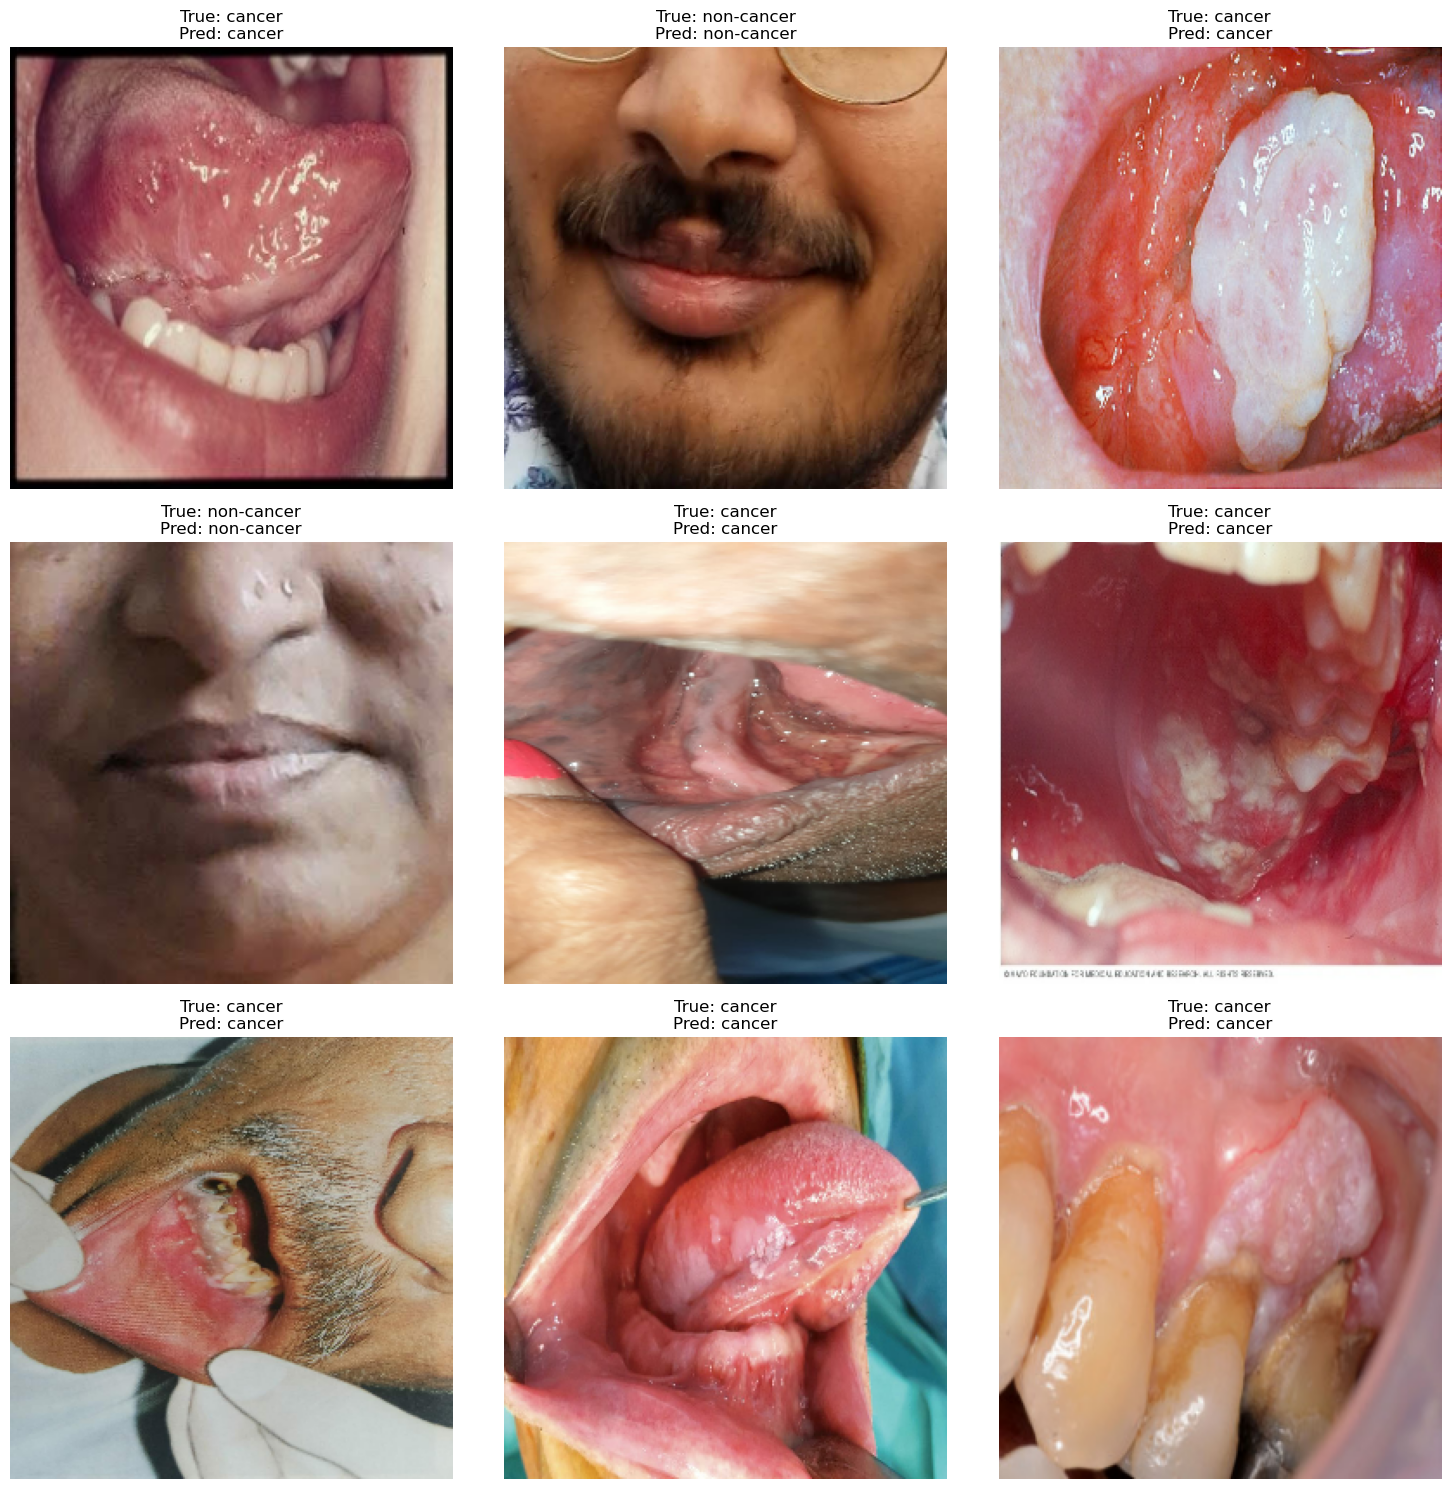

In [16]:
import matplotlib.pyplot as plt

# Function to display predictions on test images in a 3x3 grid
def show_test_predictions(model, test_ds, class_names, num_images=9):
    plt.figure(figsize=(15, 15))
    for images, labels in test_ds.take(1):  # Take one batch from the test set
        predictions = model.predict(images)
        pred_labels = np.argmax(predictions, axis=1)
        for i in range(num_images):
            ax = plt.subplot(3, 3, i + 1)  # Arrange in a 3x3 grid
            plt.imshow(images[i].numpy().astype("uint8"))
            true_label = class_names[labels[i]]
            predicted_label = class_names[pred_labels[i]]
            plt.title(f"True: {true_label}\nPred: {predicted_label}")
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Show some test predictions in a 3x3 grid
show_test_predictions(model, test_ds, class_names, num_images=9)


ModuleNotFoundError: No module named 'cv2'